In [1]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)

myecdf(A, x) = count(≤(x), A)/length(A)
safediv(x, y) = x==0 ? zero(x/y) : x/y

function sim_OR(; m=8, n=12, p=0.6, q=0.4, Niters=10^5)
    logOR = log(safediv(p*(1-q), (1-p)*q))
    SE = √(1/(m*p) + 1/(m*(1-p)) + 1/(n*q) + 1/(n*(1-q)))
    bin1 = Binomial(m, p)
    bin2 = Binomial(n, q)
    logORhat = zeros(Niters)
    Threads.@threads for i in 1:Niters
        a, c = rand(bin1), rand(bin2)
        b, d = m-a, n-c
        logORhat[i] = log(safediv(a*d, b*c))
    end
    (; logORhat, logOR, SE, m, n, p, q, Niters)
end

function plot_sim_OR(; m=10, n=15, p=0.6, q=0.4, Niters=10^5)
    (; logORhat, logOR, SE, m, n, p, q, Niters) = sim_OR(; m, n, p, q, Niters)
    
    P = plot(x -> myecdf(logORhat, x), logOR-5SE, logOR+5SE; label="ecdf of log ORhat")
    plot!(x -> cdf(Normal(logOR, SE), x); label="cdf of Normal(logOR, SE)", ls=:dash)
    plot!(xguide="log ORhat")
    title!("Binomial($m, $p) × Binomial($n, $q)")

    Q = histogram(logORhat; norm=true, alpha=0.3, label="log ORhat")
    plot!(Normal(logOR, SE); label="Normal(logOR, SE)", ls=:dash)
    plot!(xguide="log ORhat")
    title!("Binomial($m, $p) × Binomial($n, $q)")

    plot(P, Q; size=(600, 600), layout=(2, 1))
end

plot_sim_OR (generic function with 1 method)

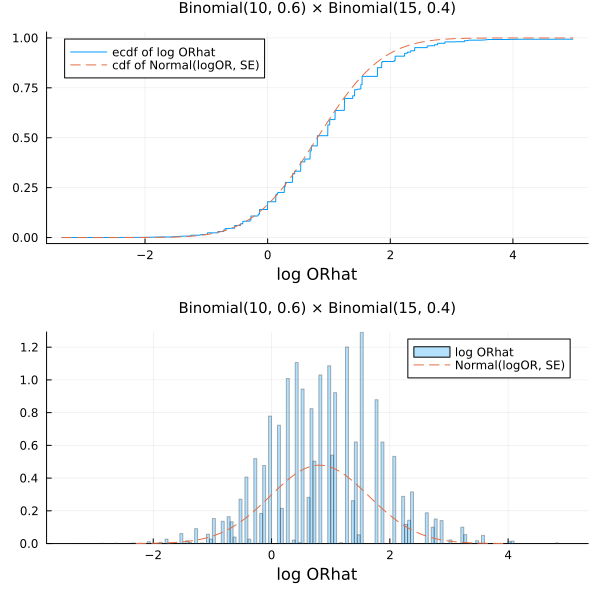

In [2]:
plot_sim_OR(; m=10, n=15, p=0.6, q=0.4, Niters=10^5)

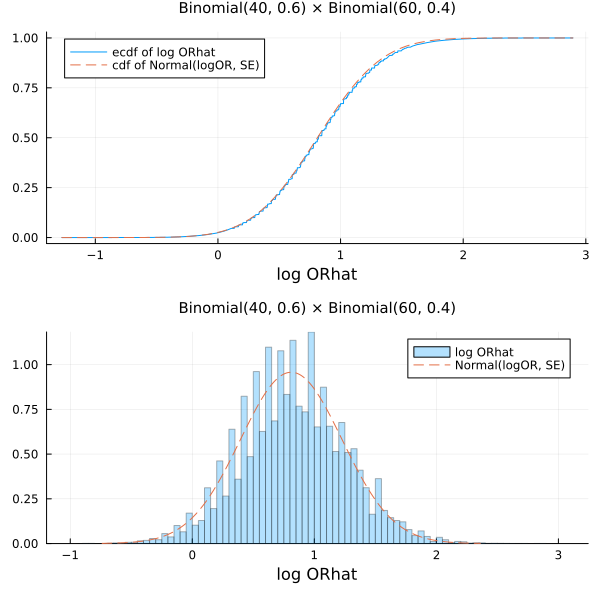

In [3]:
plot_sim_OR(; m=40, n=60, p=0.6, q=0.4, Niters=10^5)

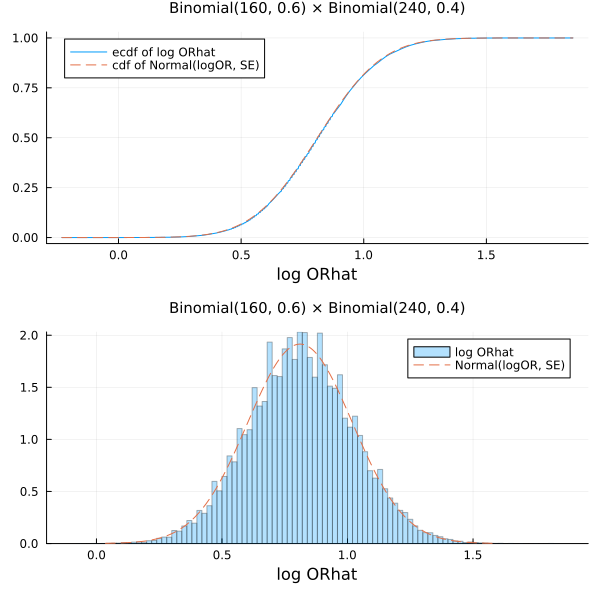

In [4]:
plot_sim_OR(; m=160, n=240, p=0.6, q=0.4, Niters=10^5)

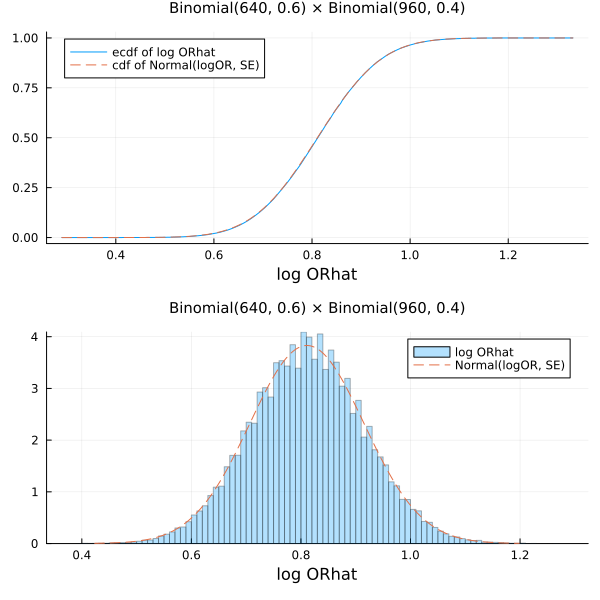

In [5]:
plot_sim_OR(; m=640, n=960, p=0.6, q=0.4, Niters=10^5)